<a href="https://colab.research.google.com/github/BrunaAmorimUFPE/Topicos_4/blob/main/T%C3%B3picos_4_Atividade_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Introdução
O objetivo deste projeto é criar um modelo preditivo usando redes neurais para estimar o preço médio de casas na Califórnia com base em variáveis socioeconômicas e geográficas. A precificação de imóveis é crucial para o mercado imobiliário, pois ajuda compradores, vendedores e investidores a tomar decisões informadas, e é sabido que os valores de imoóveis são muito voláteis, principalmente na Califórnia, onde existem grandes polos tecnológicos e culturais, além de grande probabilidade de desastres naturais. Utilizaremos técnicas de aprendizado de máquina para construir um modelo que generalize bem e forneça previsões precisas.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

##2. Carregamento e Exploração dos Dados

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154 

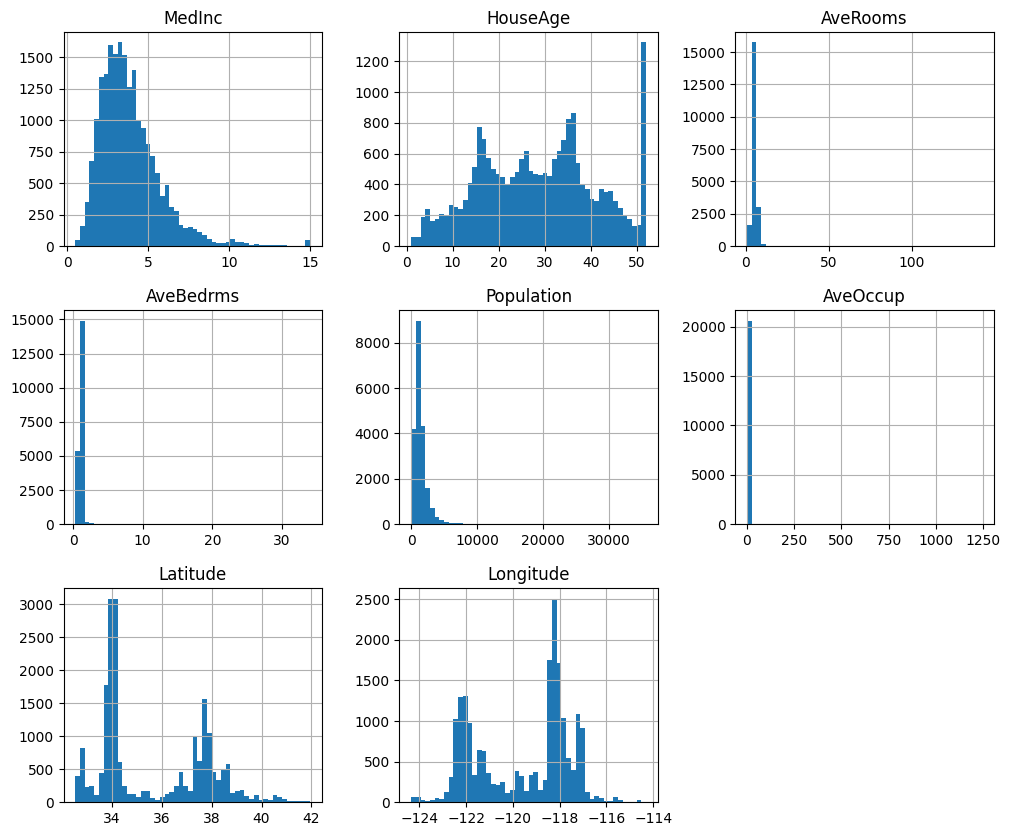

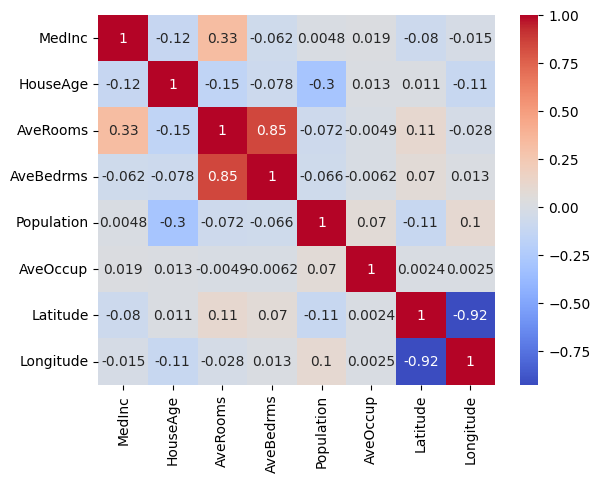

In [39]:
# Carregar o dataset
california = fetch_california_housing() #Carrega o dataset da Califórnia da Scikit-Learn
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="MedHouseVal") #Convertem os dados em um formato tabular (DataFrame) para facilitar a manipulação e análise.

# Exibir as primeiras linhas do dataset
print(X.head())
print(y.head())

# Estatísticas descritivas: média, desvio padrão, mínimo, máximo, etc. para entender a distribuição dos dados.
print(X.describe())

# Visualizar a distribuição das variáveis
X.hist(bins=50, figsize=(12, 10)) #Plota histogramas das variáveis para visualizar sua distribuição.
plt.show()

# Matriz de correlação
corr_matrix = X.corr() #Calculam e exibem a matriz de correlação entre as variáveis, ajudando a identificar relações lineares entre elas.
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

##3. Pré-processamento

In [40]:
# Normalizar os dados
scaler = StandardScaler() #Normaliza os dados para que todas as variáveis tenham média 0 e desvio padrão 1.
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Treino: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}")

Treino: (14448, 8), Validação: (3096, 8), Teste: (3096, 8)


##4. Criação e Treinamento dos Modelos

###4.1 Rede Neural

In [41]:
# Criar a arquitetura da rede neural
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Camada de saída com ativação linear
])

# Configura o modelo para treinamento
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Resumo do modelo
model.summary()

# Treinar o modelo com monitoramento do desempenho no conjunto de validação
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Fazer previsões nos conjuntos de validação e teste
y_val_pred = model.predict(X_val).flatten()
y_test_pred = model.predict(X_test).flatten()

# Calcular MAE, MSE e R² para validação e teste
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Exibir os resultados
print(f"Rede Neural - MAE (Validação): {mae_val:.4f}")
print(f"Rede Neural - MAE (Teste): {mae_test:.4f}")
print(f"Rede Neural - MSE (Validação): {mse_val:.4f}")
print(f"Rede Neural - MSE (Teste): {mse_test:.4f}")
print(f"Rede Neural - R² (Validação): {r2_val:.4f}")
print(f"Rede Neural - R² (Teste): {r2_test:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.7465 - mae: 0.9333 - val_loss: 0.4751 - val_mae: 0.5035
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4327 - mae: 0.4683 - val_loss: 0.4013 - val_mae: 0.4467
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3828 - mae: 0.4394 - val_loss: 0.3813 - val_mae: 0.4322
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3871 - mae: 0.4301 - val_loss: 0.3651 - val_mae: 0.4284
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3590 - mae: 0.4204 - val_loss: 0.3601 - val_mae: 0.4158
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3397 - mae: 0.4069 - val_loss: 0.3439 - val_mae: 0.4079
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3201 - mae: 0.3916 - val_loss: 0.3394 - val_mae: 0.4003
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3169 - mae: 0.3879 - val_loss: 0.3375 - val_mae: 0.4097
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/

###4.2 Árvore de decisão

In [42]:
# Criar e treinar o modelo de Árvore de Decisão
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Prever no conjunto de validação e teste
y_val_pred_tree = tree_model.predict(X_val)
y_test_pred_tree = tree_model.predict(X_test)

# Calcular MAE e R² para validação e teste
mae_val_tree = mean_absolute_error(y_val, y_val_pred_tree)
mae_test_tree = mean_absolute_error(y_test, y_test_pred_tree)
mse_val_tree = mean_squared_error(y_val, y_val_pred_tree)
mse_test_tree = mean_squared_error(y_test, y_test_pred_tree)
r2_val_tree = r2_score(y_val, y_val_pred_tree)
r2_test_tree = r2_score(y_test, y_test_pred_tree)

print(f"Árvore de Decisão - MAE (Validação): {mae_val_tree:.4f}")
print(f"Árvore de Decisão - MAE (Teste): {mae_test_tree:.4f}")
print(f"Árvore de Decisão - MSE (Validação): {mse_val_tree:.4f}")
print(f"Árvore de Decisão - MSE (Teste): {mse_test_tree:.4f}")
print(f"Árvore de Decisão - R² (Validação): {r2_val_tree:.4f}")
print(f"Árvore de Decisão - R² (Teste): {r2_test_tree:.4f}")

Árvore de Decisão - MAE (Validação): 0.4718
Árvore de Decisão - MAE (Teste): 0.4660
Árvore de Decisão - MSE (Validação): 0.5243
Árvore de Decisão - MSE (Teste): 0.5288
Árvore de Decisão - R² (Validação): 0.5976
Árvore de Decisão - R² (Teste): 0.6001


###4.3 Random Forest

In [43]:
# Criar e treinar o modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prever no conjunto de validação e teste
y_val_pred_rf = rf_model.predict(X_val)
y_test_pred_rf = rf_model.predict(X_test)

# Calcular MAE e R² para validação e teste
mae_val_rf = mean_absolute_error(y_val, y_val_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
mse_val_rf = mean_squared_error(y_val, y_val_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_val_rf = r2_score(y_val, y_val_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"Random Forest - MAE (Validação): {mae_val_rf:.4f}")
print(f"Random Forest - MAE (Teste): {mae_test_rf:.4f}")
print(f"Random Forest - MSE (Validação): {mse_val_rf:.4f}")
print(f"Random Forest - MSE (Teste): {mse_test_rf:.4f}")
print(f"Random Forest - R² (Validação): {r2_val_rf:.4f}")
print(f"Random Forest - R² (Teste): {r2_test_rf:.4f}")

Random Forest - MAE (Validação): 0.3387
Random Forest - MAE (Teste): 0.3257
Random Forest - MSE (Validação): 0.2699
Random Forest - MSE (Teste): 0.2429
Random Forest - R² (Validação): 0.7928
Random Forest - R² (Teste): 0.8163


##5. Avaliação dos Modelos e Resultados

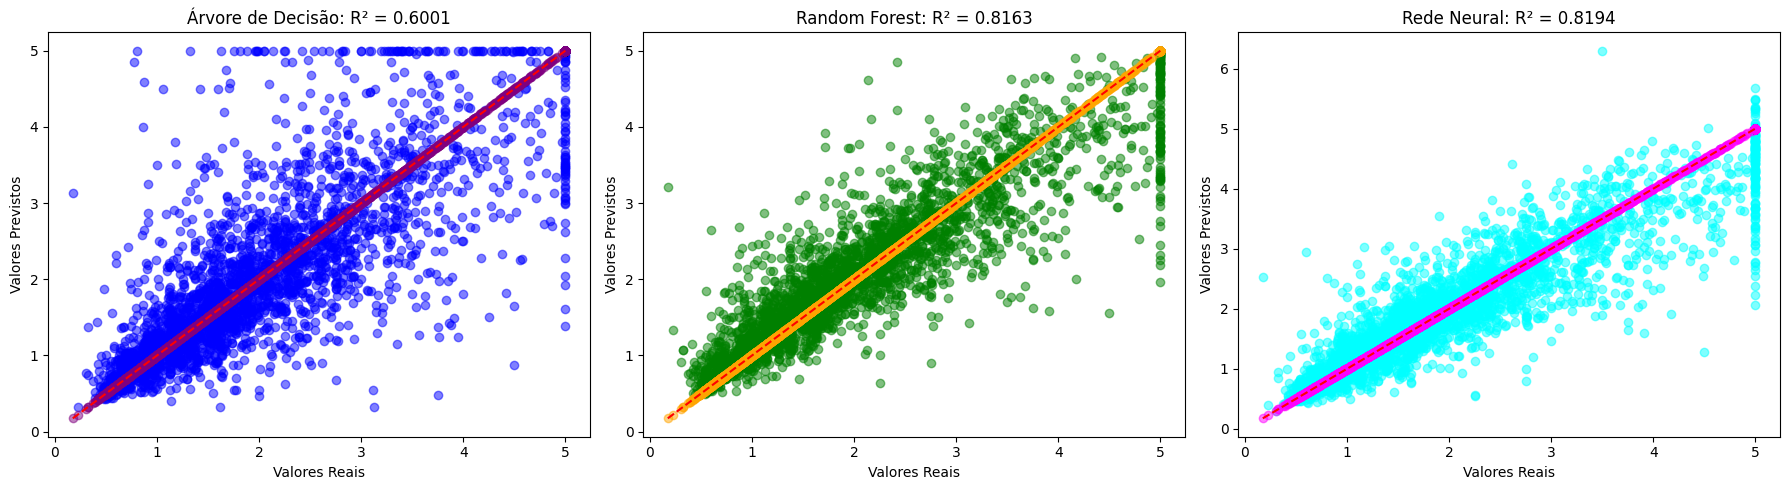

In [44]:
# Plotar valores reais vs. previstos para Árvore de Decisão
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_test_pred_tree, color='blue', alpha=0.5, label='Previstos')
plt.scatter(y_test, y_test, color='purple', alpha=0.5, label='Reais')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title(f"Árvore de Decisão: R² = {r2_test_tree:.4f}")

# Plotar valores reais vs. previstos para Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_test_pred_rf, color='green', alpha=0.5, label='Previstos')
plt.scatter(y_test, y_test, color='orange', alpha=0.5, label='Reais')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title(f"Random Forest: R² = {r2_test_rf:.4f}")

# Plotar valores reais vs. previstos para Rede Neural
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_test_pred_nn, color='cyan', alpha=0.5, label='Previstos')
plt.scatter(y_test, y_test, color='magenta', alpha=0.5, label='Reais')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title(f"Rede Neural: R² = {r2_test_nn:.4f}")

plt.tight_layout()
plt.show()

##6. Conclusão
Neste projeto, implementamos uma rede neural, árvore de decisão e random forest para prever preços de imóveis na Califórnia e comparar a acurácia dos modelos entre si, usando MAE, MSE e R². Sabendo que:

Quanto menor o MAE, menor é o erro médio do modelo.

O MSE penaliza erros maiores mais do que o MAE, pois eleva as diferenças ao quadrado.

Para R², valores mais próximos de 1 indicam que o modelo explica bem a variabilidade dos dados. Valores próximos de 0 indicam que o modelo não explica a variância. Um R² negativo indica um modelo pior do que uma simples média dos dados.

Nesse caso, o Random Forest foi o melhor modelo, apresentando menor MAE e MSE e maior R².

Outras medidas que podem ser tomadas para otimizar o modelo são:

Ajuste de hiperparâmetros.
Aumento do tamanho do dataset.
Uso de técnicas de regularização (ex.: dropout).